In [90]:
import pandas as pd

citibike_data = None

for month in range(1,13):
    if month < 10:
        month_str = f'0{month}'
    else:
        month_str = f'{month}'
    print('Loading month', month_str)
    current_month = pd.read_csv(f'../dataset/2018{month_str}-citibike-tripdata.csv')
    
    if citibike_data is None:
        citibike_data = current_month
    else:
        citibike_data = citibike_data.append(current_month)
citibike_data = citibike_data.dropna()

Loading month 01
Loading month 02
Loading month 03
Loading month 04
Loading month 05
Loading month 06
Loading month 07
Loading month 08
Loading month 09
Loading month 10
Loading month 11
Loading month 12


In [91]:
citibike_data = citibike_data.dropna()

import numpy as np

citibike_data['starttime'] = pd.to_datetime(citibike_data['starttime'])
citibike_data['stoptime'] = pd.to_datetime(citibike_data['stoptime'])

citibike_data['tripduration'] = (citibike_data['stoptime'] - citibike_data['starttime']).dt.total_seconds().apply(np.floor).astype(int)

filter_columns = [
    'tripduration', 
    'starttime', 
    'stoptime', 
    'start station id',
    'start station latitude',
    'start station longitude',
    'end station id',
    'end station latitude',
    'end station longitude',
    'usertype',
    'birth year',
    'gender'
]
citibike_data = citibike_data[filter_columns]
citibike_data = citibike_data[citibike_data['tripduration'] <= 20*24*60*60]

citibike_data = citibike_data[citibike_data['end station latitude'] <= 41.13]
citibike_data = citibike_data[citibike_data['start station latitude'] <= 41.13]
citibike_data = citibike_data[citibike_data['end station latitude'] >= 40.12]
citibike_data = citibike_data[citibike_data['start station latitude'] >= 40.12]
citibike_data = citibike_data[citibike_data['end station longitude'] >= -74.40]
citibike_data = citibike_data[citibike_data['start station longitude'] >= -74.40]
citibike_data = citibike_data[citibike_data['end station longitude'] <= -73.19]
citibike_data = citibike_data[citibike_data['start station longitude'] <= -73.19]

citibike_data['start_weekday'] = citibike_data['starttime'].dt.day_name()

citibike_data

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,birth year,gender,start_weekday
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,Subscriber,1992,1,Monday
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,Subscriber,1969,1,Monday
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,Subscriber,1956,1,Monday
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,Subscriber,1974,1,Monday
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,Subscriber,1992,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016500,734,2018-12-31 23:55:06.991,2019-01-01 00:07:21.230,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,Subscriber,1986,1,Monday
1016501,2551,2018-12-31 23:55:44.307,2019-01-01 00:38:15.782,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,Customer,1969,0,Monday
1016502,2376,2018-12-31 23:56:52.850,2019-01-01 00:36:29.286,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,Subscriber,1979,1,Monday
1016503,2758,2018-12-31 23:58:29.212,2019-01-01 00:44:27.517,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,Customer,1969,0,Monday


In [92]:
citibike_data = citibike_data[citibike_data['usertype'] == 'Subscriber']

In [93]:
citibike_data

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,birth year,gender,start_weekday
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,Subscriber,1992,1,Monday
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,Subscriber,1969,1,Monday
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,Subscriber,1956,1,Monday
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,Subscriber,1974,1,Monday
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,Subscriber,1992,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016498,1027,2018-12-31 23:51:13.922,2019-01-01 00:08:21.790,423.0,40.765849,-73.986905,285.0,40.734546,-73.990741,Subscriber,1981,1,Monday
1016499,174,2018-12-31 23:53:59.072,2018-12-31 23:56:53.475,260.0,40.703652,-74.011678,260.0,40.703652,-74.011678,Subscriber,1980,1,Monday
1016500,734,2018-12-31 23:55:06.991,2019-01-01 00:07:21.230,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,Subscriber,1986,1,Monday
1016502,2376,2018-12-31 23:56:52.850,2019-01-01 00:36:29.286,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,Subscriber,1979,1,Monday


In [94]:
citibike_data = citibike_data.sample(n=200)

In [95]:
citibike_data

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,birth year,gender,start_weekday
572244,575,2018-02-21 09:42:04.027,2018-02-21 09:51:39.431,3112.0,40.729060,-73.957790,460.0,40.712859,-73.965903,Subscriber,1983,2,Wednesday
1295726,1324,2018-07-24 08:02:56.774,2018-07-24 08:25:00.893,3150.0,40.775369,-73.948034,359.0,40.755103,-73.974987,Subscriber,1961,2,Tuesday
1945836,2105,2018-06-12 13:24:44.015,2018-06-12 13:59:49.865,3686.0,40.739448,-74.005070,3396.0,40.678356,-74.000145,Subscriber,1981,1,Tuesday
21381,143,2018-07-16 16:11:56.036,2018-07-16 16:14:19.123,128.0,40.727103,-74.002971,347.0,40.728846,-74.008591,Subscriber,1983,1,Monday
1042306,4039,2018-04-28 13:00:55.327,2018-04-28 14:08:14.601,3300.0,40.665147,-73.976376,3300.0,40.665147,-73.976376,Subscriber,1969,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154242,743,2018-11-03 13:23:02.950,2018-11-03 13:35:26.668,3616.0,40.765625,-73.913669,3532.0,40.781450,-73.918330,Subscriber,1958,1,Saturday
303565,434,2018-02-08 13:54:00.669,2018-02-08 14:01:14.983,442.0,40.746647,-73.993915,223.0,40.737815,-73.999947,Subscriber,1956,1,Thursday
968457,90,2018-03-24 12:55:55.976,2018-03-24 12:57:26.286,3659.0,40.742949,-74.004137,3660.0,40.741022,-74.001385,Subscriber,1996,1,Saturday
841562,205,2018-05-10 19:15:55.393,2018-05-10 19:19:20.580,492.0,40.750200,-73.990931,442.0,40.746647,-73.993915,Subscriber,1971,2,Thursday


In [96]:
citibike_data = citibike_data[[
    'tripduration', 
    'starttime',
    'start station latitude', 
    'start station longitude', 
    'end station latitude', 
    'end station longitude'
]]

In [97]:
citibike_data

,tripduration,starttime,start station latitude,start station longitude,end station latitude,end station longitude
572244,575,2018-02-21 09:42:04.027,40.729060,-73.957790,40.712859,-73.965903
1295726,1324,2018-07-24 08:02:56.774,40.775369,-73.948034,40.755103,-73.974987
1945836,2105,2018-06-12 13:24:44.015,40.739448,-74.005070,40.678356,-74.000145
21381,143,2018-07-16 16:11:56.036,40.727103,-74.002971,40.728846,-74.008591
1042306,4039,2018-04-28 13:00:55.327,40.665147,-73.976376,40.665147,-73.976376
...,...,...,...,...,...,...
154242,743,2018-11-03 13:23:02.950,40.765625,-73.913669,40.781450,-73.918330
303565,434,2018-02-08 13:54:00.669,40.746647,-73.993915,40.737815,-73.999947
968457,90,2018-03-24 12:55:55.976,40.742949,-74.004137,40.741022,-74.001385
841562,205,2018-05-10 19:15:55.393,40.750200,-73.990931,40.746647,-73.993915


In [98]:
pip install routingpy

Note: you may need to restart the kernel to use updated packages.


In [99]:
from routingpy import HereMaps
from pprint import pprint



client = HereMaps(
    app_id='PKJ1u4Jm2vm4IbBjAIRf',
    app_code='qI1VbteYxklRbB1kVnjDrw'
)

coords = [[-73.985180, 40.720664], [-73.981346, 40.714215]]
#car_route = client.directions(locations=coords, profile='car', departure='2018-12-10T13:50:07.838')
pt_route = client.directions(
    locations=coords, 
    profile='publicTransport', 
    departure='2018-12-10T13:50:07.838',
    avoid_transport_types=[
        'busPublic', 
        'busTouristic', 
        'busIntercity', 
        'busExpress', 
        'railLight', 
        'railRegional', 
        'trainRegional', 
        'trainIntercity', 
        'trainHighSpeed', 
        'monoRail', 
        'aerial', 
        'inclined', 
        'water', 
        'privateService'
    ]

)

#print('duration', car_route.duration)
print('duration', pt_route.duration)

duration 1167


In [100]:
def compute_route_time(profile, row, avoid_transport_types=None):
    start_loc = [row['start station longitude'], row['start station latitude']]
    end_loc = [row['end station longitude'], row['end station latitude']]
    locations = [start_loc, end_loc]
    departure = row['starttime'].strftime('%Y-%m-%dT%H:%M:%S.%f')
    
    if avoid_transport_types is None:
        route = client.directions(
            locations=locations, 
            profile=profile, 
            departure=departure
        )
    else:
        route = client.directions(
            locations=locations, 
            profile=profile, 
            departure=departure,
            avoid_transport_types=avoid_transport_types
        )
    row[profile] = route.duration
    return row

In [101]:
avoid_transport_types=[
    'busPublic', 
    'busTouristic', 
    'busIntercity', 
    'busExpress', 
    'railLight', 
    'railRegional', 
    'trainRegional', 
    'trainIntercity', 
    'trainHighSpeed', 
    'monoRail', 
    'aerial', 
    'inclined', 
    'water', 
    'privateService'
]

citibike_data = citibike_data.apply(
    lambda row: compute_route_time(profile='car', row=row), axis=1
)
citibike_data = citibike_data.apply(
    lambda row: compute_route_time(
        profile='publicTransport', 
        row=row, 
        avoid_transport_types=avoid_transport_types
    ), 
    axis=1
)

In [102]:
citibike_data

,tripduration,starttime,start station latitude,start station longitude,end station latitude,end station longitude,car,publicTransport
572244,575,2018-02-21 09:42:04.027,40.729060,-73.957790,40.712859,-73.965903,387,2676
1295726,1324,2018-07-24 08:02:56.774,40.775369,-73.948034,40.755103,-73.974987,662,1961
1945836,2105,2018-06-12 13:24:44.015,40.739448,-74.005070,40.678356,-74.000145,927,2687
21381,143,2018-07-16 16:11:56.036,40.727103,-74.002971,40.728846,-74.008591,175,691
1042306,4039,2018-04-28 13:00:55.327,40.665147,-73.976376,40.665147,-73.976376,0,0
...,...,...,...,...,...,...,...,...
154242,743,2018-11-03 13:23:02.950,40.765625,-73.913669,40.781450,-73.918330,472,2426
303565,434,2018-02-08 13:54:00.669,40.746647,-73.993915,40.737815,-73.999947,486,485
968457,90,2018-03-24 12:55:55.976,40.742949,-74.004137,40.741022,-74.001385,211,402
841562,205,2018-05-10 19:15:55.393,40.750200,-73.990931,40.746647,-73.993915,123,405


In [103]:
durations_df = citibike_data[['tripduration', 'car', 'publicTransport']]
durations_df

,tripduration,car,publicTransport
572244,575,387,2676
1295726,1324,662,1961
1945836,2105,927,2687
21381,143,175,691
1042306,4039,0,0
...,...,...,...
154242,743,472,2426
303565,434,486,485
968457,90,211,402
841562,205,123,405


In [108]:
durations_df['shortest'] = durations_df[['tripduration', 'car', 'publicTransport']].idxmin(axis=1)
durations_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tripduration,car,publicTransport,shortest
572244,575,387,2676,car
1295726,1324,662,1961,car
1945836,2105,927,2687,car
21381,143,175,691,tripduration
1042306,4039,0,0,car
...,...,...,...,...
154242,743,472,2426,car
303565,434,486,485,tripduration
968457,90,211,402,tripduration
841562,205,123,405,car


In [114]:
durations_df['shortest'].value_counts()

car             175
tripduration     25
Name: shortest, dtype: int64

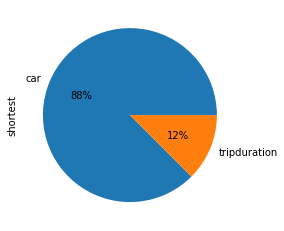

In [113]:
durations_df['shortest'].value_counts().plot(kind='pie', autopct='%1.0f%%')